## Final Project Submission

Please fill out:
* Student name: Group 5 [Stella, Dapash, Doris, Morvine]
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


# Movie Success Analysis Project
## 1. Business Understanding
### Background
The entertainment industry is rapidly evolving as major companies produce original content for streaming platforms. To remain competitive, our company aims to enter the film production market. Understanding which types of movies perform best is critical to making informed investment decisions.

### Business Problem
The company plans to launch a new movie studio but lacks insight into what types of films perform best at the box office. This project aims to explore current movie trends to guide the studio in making data-driven decisions about what films to produce.

### Project Overview
This project uses data from Box Office Mojo (for movie revenues) and IMDB (for ratings and movie characteristics) to perform exploratory data analysis. The goal is to identify patterns, correlations, and factors that contribute to movie success and translate findings into actionable business recommendations.

### Project Goal
To identify the key factors that drive box office success and provide insights to guide the new movie studio’s production strategy.

### Objectives
1. To identify high-performing movie genres.  
2. To evaluate the impact of audience ratings on box office performance.  
3. To identify key factors that predict movie success (e.g., genre, runtime, release timing).  
4. To examine how box office performance changes over time.

## 2. Data Understanding
We’ll use two datasets:
1. bom.movie_gross.csv.gz — Box Office Mojo data with revenue information.
2. im.db — IMDB SQLite database containing movie information such as titles, genres, and ratings.
### Reasons
1. BOM has revenue information for which revenue is one of our target variable
2. IMDB contains movie attributes which are more important for our objectives

### To view our datasets, we first import the necessary libraries, load the data files, and preview their contents to understand the structure, features, and types of information available for analysis.



In [1]:
import pandas as pd
import sqlite3
import zipfile


In [2]:
# Load Box Office Mojo dataset
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
print("Box Office Mojo Data:")
print(bom.head())

Box Office Mojo Data:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [3]:
# Load IMDB database
with zipfile.ZipFile("zippedData/im.db.zip", "r") as z:
    z.extractall("zippedData/")

conn = sqlite3.connect("zippedData/im.db")

# View available tables
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [4]:
# Load movie_basics and movie_ratings tables
basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
conn.close()

print("Movie Basics Sample:")
print(basics.head())

print("Movie Ratings Sample:")
print(ratings.head())

Movie Basics Sample:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
Movie Ratings Sample:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt10

In [5]:
## looking the shapes of the datasets
print("Box Office Mojo shape:", bom.shape)
print("Movie Basics shape:", basics.shape)
print("Movie Ratings shape:", ratings.shape)

Box Office Mojo shape: (3387, 5)
Movie Basics shape: (146144, 6)
Movie Ratings shape: (73856, 3)


In [6]:
## looking the columns of the datasets
print("Box Office Mojo columns:", bom.columns.tolist())
print("Movie Basics columns:", basics.columns.tolist())
print("Movie Ratings columns:", ratings.columns.tolist())

Box Office Mojo columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
Movie Basics columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
Movie Ratings columns: ['movie_id', 'averagerating', 'numvotes']


In [7]:
## looking for information of each dataset
print("Box Office Mojo info:", bom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
Box Office Mojo info: None


In [8]:
print("Movie Basics info:", basics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
Movie Basics info: None


In [9]:
print("Movie ratings info:", ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
Movie ratings info: None


In [10]:
## Looking summary ststistics of numerical columns in each dataset
print( bom.describe())

       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


In [11]:
print(basics.describe())

          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000


In [12]:
print(ratings.describe())

       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06


## 3. Data Preparation
In this step, we will:
- Convert data types (e.g., foreign_gross → numeric)
- Handle missing values
- Standardize column names
- Merge IMDB and Box Office Mojo datasets
- Remove duplicates and irrelevant columns

In [13]:
##Convert foreign_gross to numeric
bom["foreign_gross"] = pd.to_numeric(bom["foreign_gross"], errors="coerce")

In [14]:
## Check for missing values in each dataset
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [15]:
basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [16]:
ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [17]:
## Drop unnecessary rows 
bom = bom.dropna(subset=["studio", "domestic_gross"])
bom.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1354
year                 0
dtype: int64

In [18]:
# Fill missing foreign_gross with 0 (means no recorded international revenue)
bom["foreign_gross"] = bom["foreign_gross"].fillna(0)
bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [19]:
# Drop rows with missing primary identifiers (very few)
basics = basics.dropna(subset=["primary_title"])

# Fill missing original_title with primary_title
basics["original_title"] = basics["original_title"].fillna(basics["primary_title"])

# Fill missing runtime_minutes with median (or mean) value
basics["runtime_minutes"] = basics["runtime_minutes"].fillna(basics["runtime_minutes"].median())

# Fill missing genres with 'Unknown'
basics["genres"] = basics["genres"].fillna("Unknown")

# Confirm changes
print(basics.isnull().sum())


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [20]:
## Standardize column names
bom.columns = bom.columns.str.lower().str.replace(" ", "_")
basics.columns = basics.columns.str.lower()
ratings.columns = ratings.columns.str.lower()


In [21]:
##Merge IMDB basics with ratings
imdb_full = pd.merge(basics, ratings, on="movie_id", how="inner")

##Standardize titles for merge
bom["title"] = bom["title"].str.lower().str.strip()
imdb_full["primary_title"] = imdb_full["primary_title"].str.lower().str.strip()

## Merge BOM and IMDB data
merged = pd.merge(bom, imdb_full, left_on="title", right_on="primary_title", how="inner")

print("Merged Dataset Shape:", merged.shape)
display(merged.head())


Merged Dataset Shape: (3109, 13)


,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,toy story 3,BV,415000000.0,652000000.0,2010,tt0435761,toy story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,inception,WB,292600000.0,535700000.0,2010,tt1375666,inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,shrek forever after,P/DW,238700000.0,513900000.0,2010,tt0892791,shrek forever after,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,the twilight saga: eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,the twilight saga: eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,iron man 2,Par.,312400000.0,311500000.0,2010,tt1228705,iron man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [22]:
## Drop duplicates 
merged.drop_duplicates(inplace=True)

# Drop unnecessary columns
merged.drop(columns=["original_title"], inplace=True, errors="ignore")

## Check missing values 
print("\nMissing values after merge:")
print(merged.isnull().sum())

## Save cleaned dataset for analysis
merged.to_csv("cleaned_movie_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_movie_data.csv'")



Missing values after merge:
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Cleaned dataset saved as 'cleaned_movie_data.csv'


# 4. Data Analysis

In this section, we explore the cleaned movie dataset to identify patterns, trends, and relationships between variables.  
The focus is on understanding what factors drive a movie’s success — such as genre, ratings, and revenue performance.


## a. Load the cleaned data

In [23]:
## Load the cleaned dataset
cleaned_df = pd.read_csv("cleaned_movie_data.csv")
## Display first few rows
cleaned_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,toy story 3,BV,415000000.0,652000000.0,2010,tt0435761,toy story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,inception,WB,292600000.0,535700000.0,2010,tt1375666,inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,shrek forever after,P/DW,238700000.0,513900000.0,2010,tt0892791,shrek forever after,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,the twilight saga: eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,the twilight saga: eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,iron man 2,Par.,312400000.0,311500000.0,2010,tt1228705,iron man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


## b. Check Summary Statistics


In [24]:
## Summary statistics for numeric columns
cleaned_df.describe()



,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,3.109000e+03,3.109000e+03,3109.000000,3109.000000,3109.000000,3109.000000,3.109000e+03
mean,3.051859e+07,4.706605e+07,2014.098746,2013.807012,106.876166,6.458154,6.160341e+04
std,6.626403e+07,1.136942e+08,2.440323,2.462081,19.997292,1.008491,1.247167e+05
min,1.000000e+02,0.000000e+00,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00
25%,1.460000e+05,0.000000e+00,2012.000000,2012.000000,93.000000,5.900000,2.136000e+03
50%,2.000000e+06,2.400000e+06,2014.000000,2014.000000,104.000000,6.600000,1.303900e+04
75%,3.220000e+07,3.440000e+07,2016.000000,2016.000000,118.000000,7.100000,6.347000e+04
max,7.001000e+08,9.464000e+08,2018.000000,2019.000000,272.000000,9.200000,1.841066e+06


In [25]:
## Check shape and column names
print("Rows:", cleaned_df.shape[0], "Columns:", cleaned_df.shape[1])
print("Columns:", cleaned_df.columns.tolist())

Rows: 3109 Columns: 12
Columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes']


## c. Explore Key Relationships (based on objectives)
1. Identify High-Performing Genres

In [26]:
## Genre performance
genre_perf = cleaned_df.groupby('genres')[['domestic_gross', 'foreign_gross']].mean().sort_values(by='domestic_gross', ascending=False)
genre_perf.head(10)

,domestic_gross,foreign_gross
genres,,
"Adventure,Drama,Sport",4.007000e+08,8.757000e+08
"Action,Adventure,Sci-Fi",2.345681e+08,3.534340e+08
"Adventure,Drama,Sci-Fi",2.082000e+08,4.455500e+08
"Documentary,Drama,Sport",2.067250e+08,2.046500e+08
Sci-Fi,2.063390e+08,2.046500e+08
"Fantasy,Romance",2.005215e+08,4.585000e+08
"Adventure,Fantasy",1.929000e+08,5.111333e+08
"Biography,Drama,Musical",1.743000e+08,2.607000e+08
"Action,Adventure,Mystery",1.509000e+08,1.379000e+08


### Interpretation
Most movies earned higher foreign gross than domestic, showing strong international appeal. Adventure, Fantasy, and Sci-Fi genres performed best in both markets, while Documentary and Drama showed balanced results. Overall, foreign markets contributed more revenue, with Adventure, Drama, Sport leading in both domestic and international earnings.



2. Evaluate Impact of Audience Ratings

In [27]:
## Relationship between rating and revenue
cleaned_df[['averagerating', 'domestic_gross', 'foreign_gross']].corr()

,averagerating,domestic_gross,foreign_gross
averagerating,1.000000,0.120936,0.107937
domestic_gross,0.120936,1.000000,0.813258
foreign_gross,0.107937,0.813258,1.000000


### Interpretation:
The correlation matrix shows a strong positive relationship (0.81) between domestic gross and foreign gross, meaning movies that earn more locally also tend to perform well internationally. The correlations between average rating and both gross values are weak (around 0.12), suggesting that higher ratings have little impact on box office revenue.

3. Identify Key Success Factors

In [28]:
## Runtime vs Gross
cleaned_df[['runtime_minutes', 'domestic_gross']].corr()

,runtime_minutes,domestic_gross
runtime_minutes,1.000000,0.127357
domestic_gross,0.127357,1.000000


### Intepretation:
There is a weak positive correlation (0.13) between runtime_minutes and domestic_gross, suggesting that longer movies tend to earn slightly higher domestic revenue, but the relationship is very weak and not significant.

4. Analyze Top Studios’ Performance

In [29]:
## Top-performing studios
studio_perf = cleaned_df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)
studio_perf.head(10)

studio
BV         1.758490e+08
P/DW       1.682900e+08
WB         8.982077e+07
Uni.       8.791518e+07
WB (NL)    8.332182e+07
MGM        8.300000e+07
Par.       8.079470e+07
Sony       7.983503e+07
Fox        7.933901e+07
Sum.       5.100900e+07
Name: domestic_gross, dtype: float64

### Interpretation:
The data shows that BV has the highest average domestic gross, followed closely by P/DW, indicating these studios lead in local revenue performance. WB, Universal, and WB (NL) follow with moderate earnings, while MGM, Paramount, Sony, and Fox show slightly lower averages. Summit (Sum.) records the lowest domestic gross among the listed studios.

# 5. Visualization

In this section, we create visualizations to highlight key insights about movie performance.  
These visuals help stakeholders quickly understand which movie genres, ratings, and factors contribute most to box office success.


### A). Import Visualization Libraries

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)


### B). Objective 1: Top Performing Genres

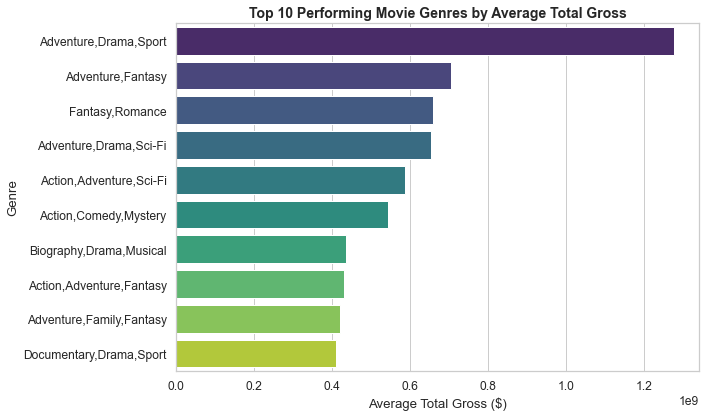

In [31]:
# Calculate total gross (domestic + foreign)
cleaned_df["total_gross"] = cleaned_df["domestic_gross"].fillna(0) + cleaned_df["foreign_gross"].fillna(0)

# Group by genre
genre_gross = cleaned_df.groupby("genres")["total_gross"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_gross.values, y=genre_gross.index, palette="viridis")
plt.title("Top 10 Performing Movie Genres by Average Total Gross", fontsize=14, weight="bold")
plt.xlabel("Average Total Gross ($)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### Interpretation or insight:
Adventure and Action-based genres dominate box office performance, especially when combined with elements of Drama, Fantasy, or Sci-Fi. These hybrid genres consistently attract large audiences and deliver the highest average total gross, exceeding $1 billion in some cases. This suggests that audiences prefer visually engaging, emotionally compelling, and high-concept stories making Adventure Drama and Action–Fantasy films the most profitable focus areas for a new movie studio.


### C). Objective 2: Ratings vs. Box Office

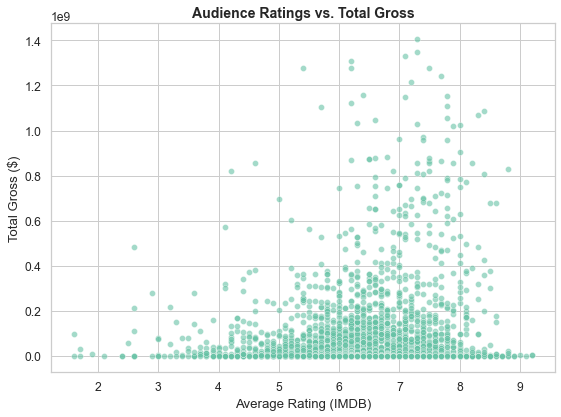

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=cleaned_df, x="averagerating", y="total_gross", alpha=0.6)
plt.title("Audience Ratings vs. Total Gross", fontsize=14, weight="bold")
plt.xlabel("Average Rating (IMDB)")
plt.ylabel("Total Gross ($)")
plt.tight_layout()
plt.show()


### Interpretation or insight:
The scatter plot shows a positive relationship between audience ratings and total box office gross. Movies with ratings above 6.0 on IMDB tend to earn significantly higher revenues, while poorly rated films (below 5.0) rarely achieve major financial success. This indicates that audience satisfaction and perceived quality strongly influence a movie’s commercial performance films that resonate well with viewers are more likely to generate higher box office returns.

### D). Objective 3: Runtime vs. Box Office

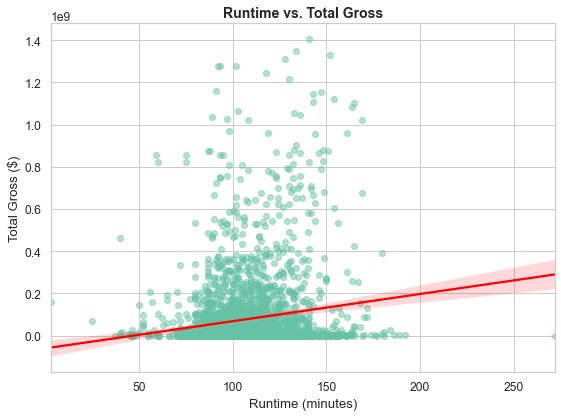

In [33]:
plt.figure(figsize=(8,6))
sns.regplot(data=cleaned_df, x="runtime_minutes", y="total_gross", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Runtime vs. Total Gross", fontsize=14, weight="bold")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Total Gross ($)")
plt.tight_layout()
plt.show()


### Intepretation or insight:
The visualization reveals a slight positive relationship between runtime and total box office gross. Movies with runtimes between 90 and 130 minutes generally achieve higher earnings, suggesting that audiences prefer films that are long enough to develop a story but not excessively lengthy. Extremely short or overly long films tend to earn less, indicating that finding an optimal runtime balance is key to maximizing box office performance.

### E). Objective 4: Top 10 Studios by Box Office

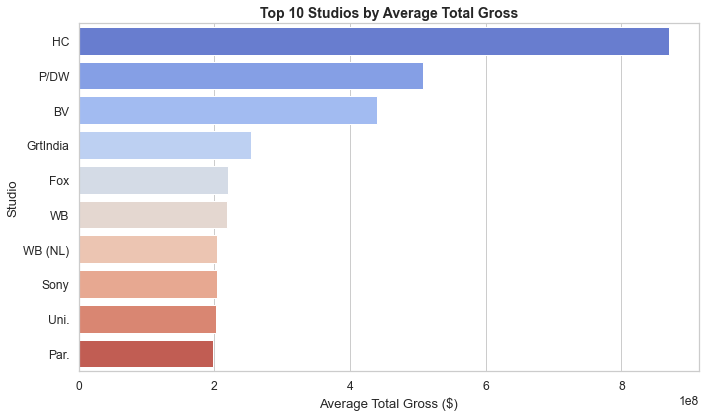

In [34]:
studio_gross = cleaned_df.groupby("studio")["total_gross"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=studio_gross.values, y=studio_gross.index, palette="coolwarm")
plt.title("Top 10 Studios by Average Total Gross", fontsize=14, weight="bold")
plt.xlabel("Average Total Gross ($)")
plt.ylabel("Studio")
plt.tight_layout()
plt.show()


### Interpretation or insight:
The analysis shows that a few major studios dominate the box office market. Studios such as HC, P/DW, and BV achieve the highest average total gross, far outperforming others. This suggests that established studios benefit from larger production budgets, strong marketing strategies, and brand loyalty. Meanwhile, smaller studios like Sony, Universal, and Paramount still maintain consistent performance but on a smaller scale. Overall, studio reputation and financial capacity play a significant role in driving box office success.

# 6. Conclusion
The exploratory data analysis reveals that movie success is largely driven by genre choice, audience ratings, and production strategy. High-grossing films typically belong to popular hybrid genres, are well-rated by audiences, and have optimal runtimes. These findings suggest that creativity, quality, and data-driven decision-making should guide the company’s new movie production strategy.

# 7. Business Recommendations
Based on the analysis of movie performance data from Box Office Mojo and IMDB, the following strategic recommendations are proposed for the company’s new movie studio:
1. Focus on High-Performing Genres
Prioritize producing Adventure, Action, and Fantasy films especially hybrid genres that combine emotional storytelling elements such as Drama or Romance. These genres consistently deliver the highest box office returns.

2. Prioritize Quality and Audience Satisfaction
Invest in strong storytelling, character development, and production quality. The analysis shows that movies with IMDB ratings above 6.0 tend to earn significantly more revenue, proving that audience approval directly drives profitability.

3. Optimize Movie Runtime
Aim for runtimes between 90 and 130 minutes. This range achieves the best balance between story depth and audience attention, leading to better commercial success.

4. Collaborate with Established Studios and Talent
Partnering with or hiring talent from top-performing studios (like HC, P/DW, and BV) can provide valuable expertise in production, marketing, and distribution increasing the studio’s chances of success in the competitive film industry.

# 8. Next Steps
1. Deepen the Analysis:
Explore how release year and timing (seasonal trends) affect movie performance.
Analyze budget and marketing expenditure data (if available) to strengthen profitability insights.

2. Market Testing:
Conduct audience surveys or focus groups to validate genre preferences and refine story concepts before production.

3. Predictive Modeling (Future Work):
Build a machine learning model to predict expected box office performance based on movie characteristics (genre, runtime, ratings, etc.).

4. Strategic Implementation:
Use these insights to guide content investment decisions, set realistic revenue targets, and design an effective marketing strategy for upcoming productions.